In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spring_df = pd.read_csv("spring_data.csv")
summer_df = pd.read_csv("summer_data.csv")
autumn_df = pd.read_csv("autumn_data.csv")
winter_df = pd.read_csv("winter_data.csv")
for df in [spring_df, summer_df, autumn_df, winter_df]:
    df["time"] = pd.to_datetime(df["time"])
    df["outlier_bool"] = df["outlier_bool"].astype(bool)


spring_df["season"] = "Spring"
summer_df["season"] = "Summer"
autumn_df["season"] = "Autumn"
winter_df["season"] = "Winter"

In [8]:
all_df = pd.concat(
    [spring_df, summer_df, autumn_df, winter_df],
    ignore_index=True
)

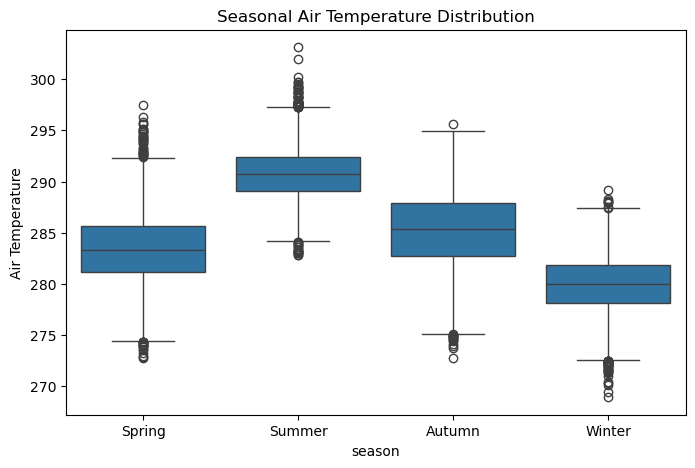

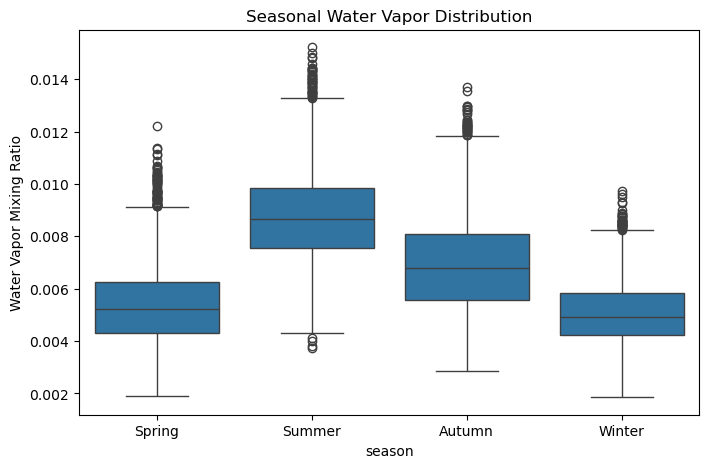

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=all_df, x="season", y="Air Temperature")
plt.title("Seasonal Air Temperature Distribution")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(data=all_df, x="season", y="Water Vapor Mixing Ratio")
plt.title("Seasonal Water Vapor Distribution")
plt.show()

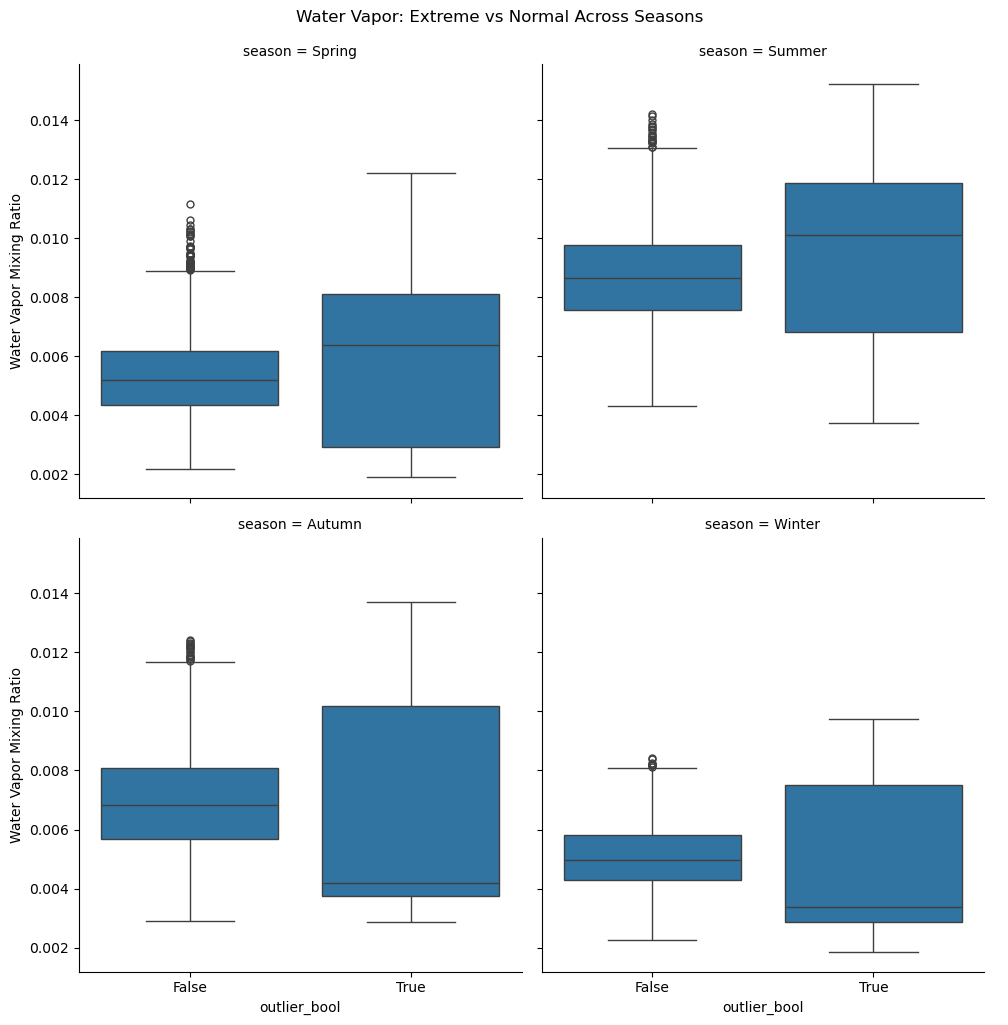

In [9]:
g = sns.catplot(
    data=all_df,
    x="outlier_bool",
    y="Water Vapor Mixing Ratio",
    col="season",
    kind="box",
    col_wrap=2,
    height=5,
    aspect=1
)

g.fig.suptitle("Water Vapor: Extreme vs Normal Across Seasons", y=1.02)

plt.show()

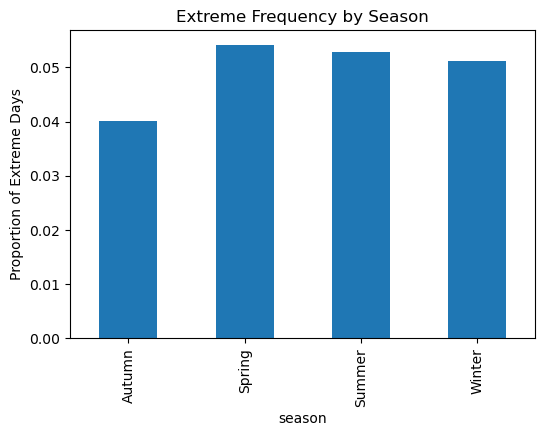

In [13]:
extreme_rate = all_df.groupby("season")["outlier_bool"].mean()

plt.figure(figsize=(6,4))
extreme_rate.plot(kind="bar")
plt.title("Extreme Frequency by Season")
plt.ylabel("Proportion of Extreme Days")
plt.show()

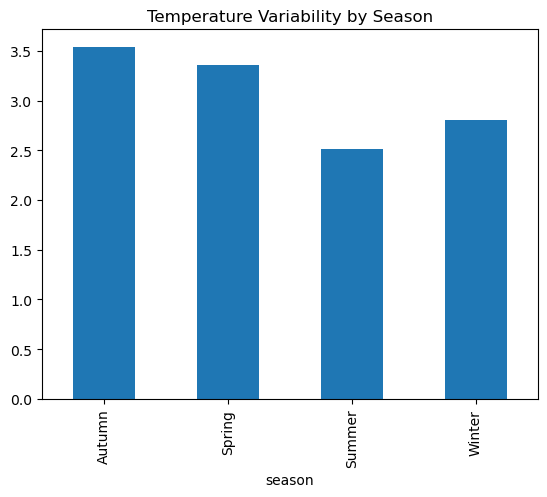

In [17]:
season_std = all_df.groupby("season")["Air Temperature"].std()
season_std.plot(kind="bar")
plt.title("Temperature Variability by Season")
plt.show()

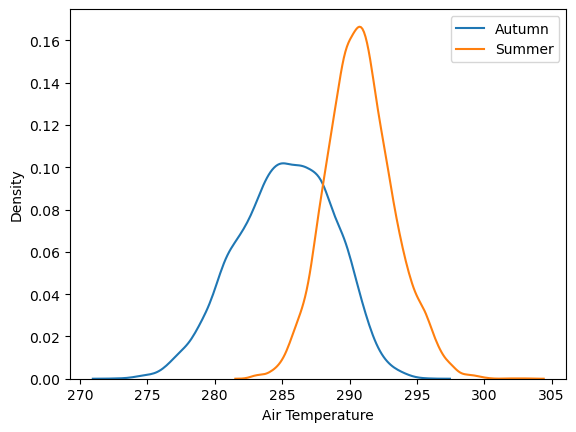

In [20]:
sns.kdeplot(data=all_df[all_df["season"]=="Autumn"],
            x="Air Temperature",
            label="Autumn")

sns.kdeplot(data=all_df[all_df["season"]=="Summer"],
            x="Air Temperature",
            label="Summer")

plt.legend()
plt.show()

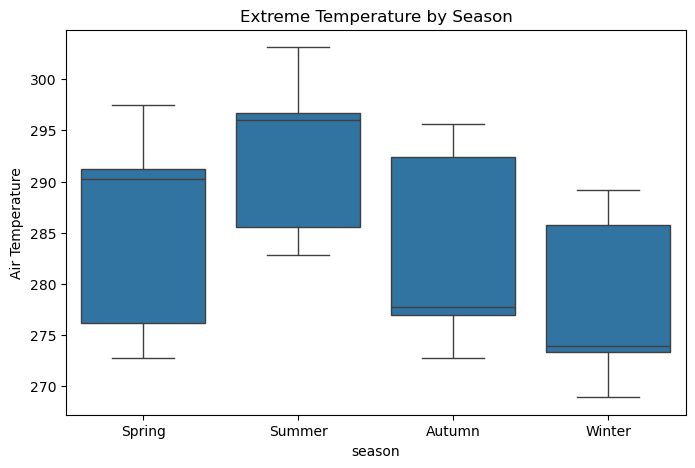

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=all_df[all_df["outlier_bool"]==True],
    x="season",
    y="Air Temperature"
)
plt.title("Extreme Temperature by Season")
plt.show()


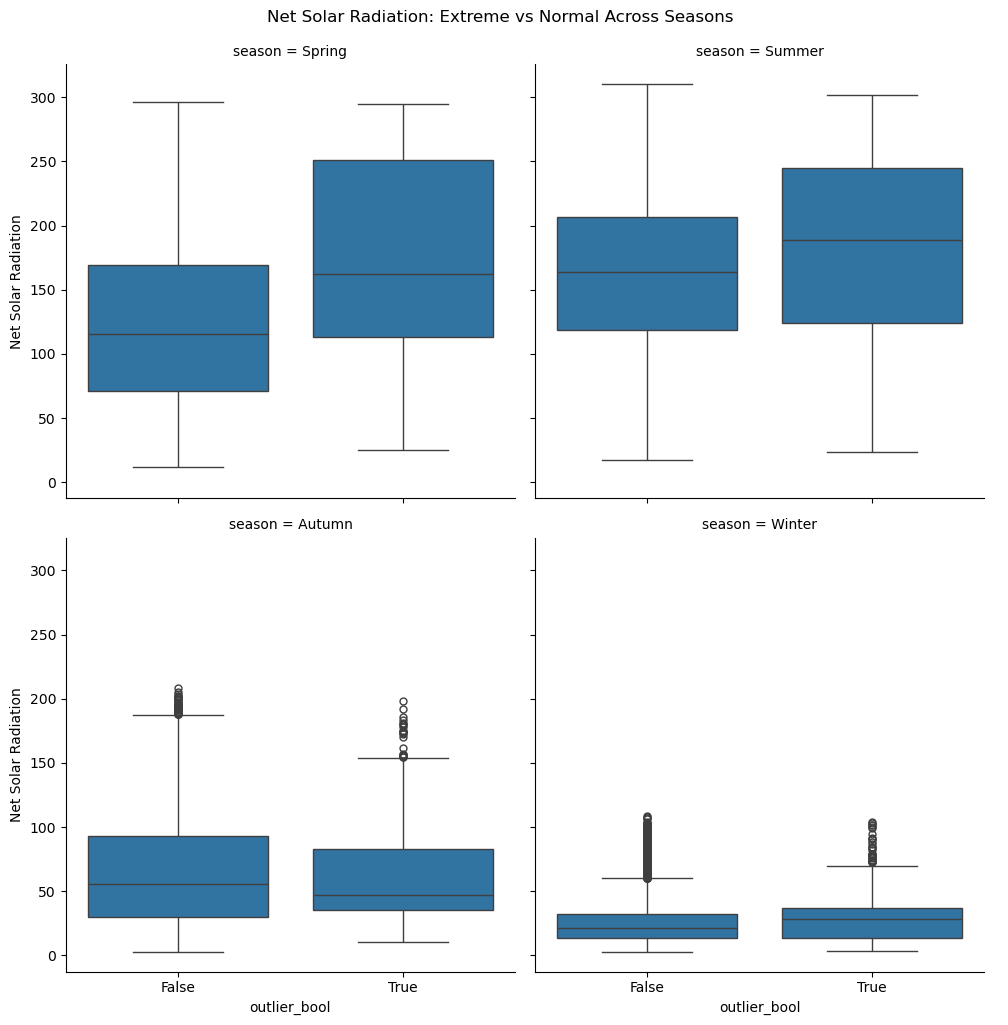

In [10]:
g = sns.catplot(
    data=all_seasons_df,
    x="outlier_bool",
    y="Net Solar Radiation",
    col="season",
    kind="box",
    col_wrap=2,
    height=5,
    aspect=1
)

g.fig.suptitle("Net Solar Radiation: Extreme vs Normal Across Seasons", y=1.02)

plt.show()

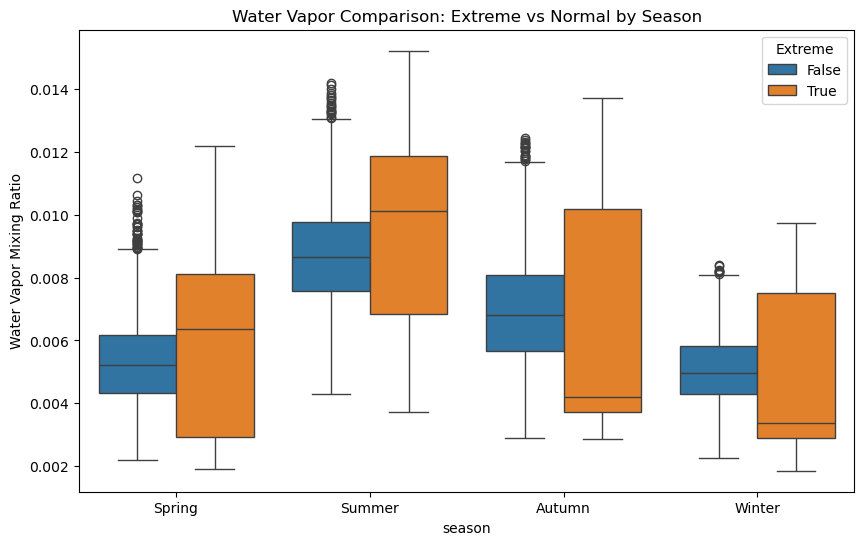

In [6]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=all_seasons_df,
    x="season",
    y="Water Vapor Mixing Ratio",
    hue="outlier_bool"
)

plt.title("Water Vapor Comparison: Extreme vs Normal by Season")
plt.legend(title="Extreme")
plt.show()

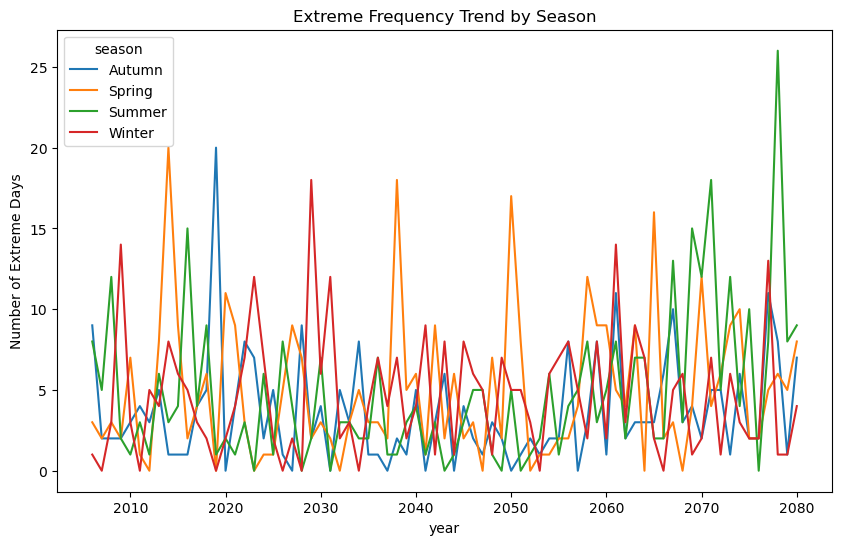

In [15]:
all_df["year"] = all_df["time"].dt.year
extreme_trend = (
    all_df.groupby(["year","season"])["outlier_bool"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=extreme_trend,
    x="year",
    y="outlier_bool",
    hue="season"
)
plt.title("Extreme Frequency Trend by Season")
plt.ylabel("Number of Extreme Days")
plt.show()

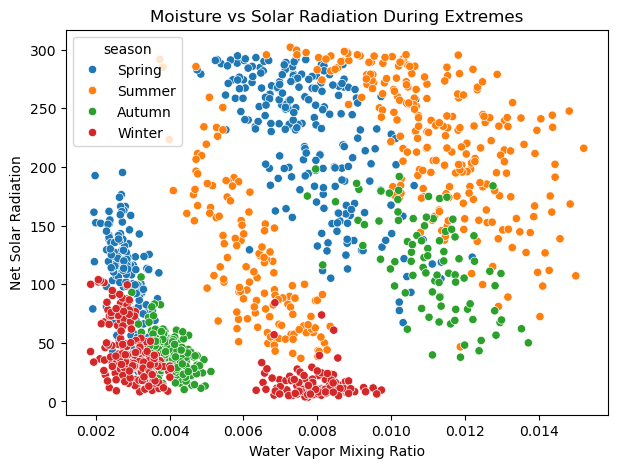

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=all_df[all_df["outlier_bool"]==True],
    x="Water Vapor Mixing Ratio",
    y="Net Solar Radiation",
    hue="season"
)
plt.title("Moisture vs Solar Radiation During Extremes")
plt.show()

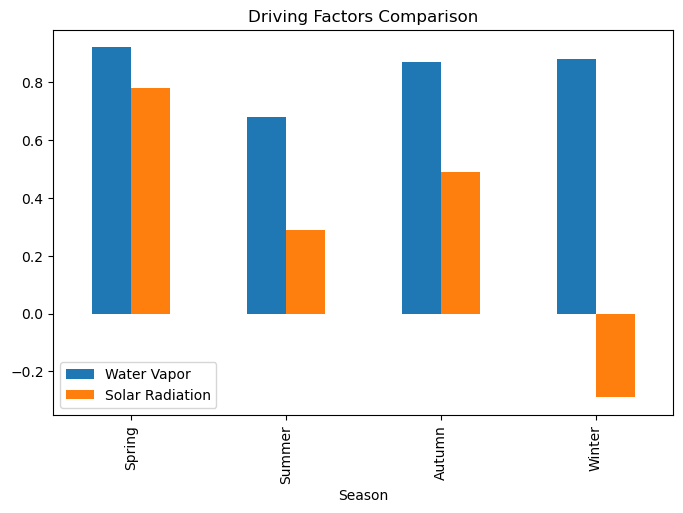

In [21]:
season_corr = pd.DataFrame({
    "Season": ["Spring", "Summer", "Autumn", "Winter"],
    "Water Vapor": [0.92, 0.68, 0.87, 0.88],
    "Solar Radiation": [0.78, 0.29, 0.49, -0.29]
})

season_corr.set_index("Season").plot(kind="bar", figsize=(8,5))
plt.title("Driving Factors Comparison")
plt.show()